In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from utils import load_dataset, aggregate, plot_quantiles, plot_surface, plot_common
import matplotlib.pyplot as plt
from IPython.display import Markdown

algorithm = 'add'
pd.set_option('display.max_rows', 10000)
data = load_dataset('csv', 'add_test_2048x2048x')
data = data[data['size'].isin([1, 2, 4, 6, 8]) & data['image_size'].isin([10, 50, 100, 500, 1000, 1500, 2000, 2500, 3000])]

## Comparison between methods

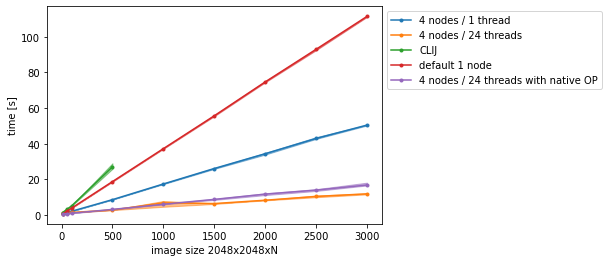

In [2]:
idx = 0
def plot_q(method, node, label):
    global idx
    p2, p5, p8 = [(aggregate(data[data['size'] == node], method=method, stat='total_op', aggfunc=lambda x: x.quantile(q))/1000) for q in [0.2, 0.5, 0.8]]
    plt.plot(p5, marker='.', label=label)
    plt.fill_between(p8.index, p8[node], p2[node], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][idx], alpha=0.5)
    idx += 1

plot_q('mpisingle', 4, '4 nodes / 1 thread')
plot_q('mpi', 4, '4 nodes / 24 threads')
plot_q('clij', 1, 'CLIJ')
plot_q('default', 1, 'default 1 node')
plot_q('nativempi', 4, '4 nodes / 24 threads with native OP')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xlabel('image size 2048x2048xN')
plt.ylabel('time [s]')
plt.savefig('figures/add_comparison.pdf')

## Measured time with CLIJ

Text(0, 0.5, 'time [s]')

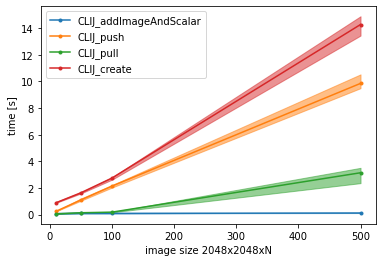

In [3]:
for i, stat in enumerate(['CLIJ_addImageAndScalar', 'CLIJ_push', 'CLIJ_pull', 'CLIJ_create']):
    p2, p5, p8 = [(aggregate(data, method='clij', stat=stat, aggfunc=lambda x: x.quantile(q))/1000) for q in [0.2, 0.5, 0.8]]
    plt.plot(p5, marker='.', label=stat)
    plt.fill_between(p8.index, p8[1], p2[1], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i], alpha=0.5)
plt.legend()
plt.xlabel('image size 2048x2048xN')
plt.ylabel('time [s]')

## Measured time with native OP

Text(0, 0.5, 'time [s]')

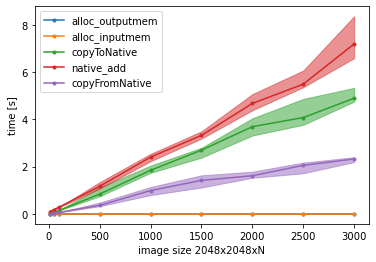

In [4]:
for i, stat in enumerate(['alloc_outputmem', 'alloc_inputmem', 'copyToNative', 'native_add', 'copyFromNative']):
    p2, p5, p8 = [(aggregate(data, method='nativempi', stat=stat, aggfunc=lambda x: x.quantile(q))/1000) for q in [0.2, 0.5, 0.8]]
    plt.plot(p5, marker='.', label=stat)
    plt.fill_between(p8.index, p8[4], p2[4], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i], alpha=0.5)
plt.legend()
plt.xlabel('image size 2048x2048xN')
plt.ylabel('time [s]')